<a href="https://colab.research.google.com/github/claudiatamas/colab_notebooks/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Naive Bayes***


---



### **Teoria algoritmului:**
Naive Bayes este un algoritm simplu și eficient de clasificare bazat pe aplicarea Teoremei lui Bayes cu presupunerea de independență între predictorii (caracteristicile). Este numit "naiv" pentru că presupune că existența unei anumite caracteristici într-o clasă este independentă de existența oricărei alte caracteristici, chiar dacă aceste caracteristici pot depinde una de alta în realitate. Naive Bayes este rapid și ușor de implementat, ceea ce îl face bun pentru seturi de date mari. Este adesea folosit pentru clasificarea textului, cum ar fi detectarea spam-ului în emailuri sau analiza sentimentelor în recenziile de produse.
### **Descrierea problemei:**
Problema practică este predicția tipului de vreme pe baza datelor meteorologice istorice precum precipitații, temperaturi maxime și minime și viteză a vântului.

### **Biblioteci utilizate:**

* **pandas** - Este o bibliotecă software scrisă pentru limbajul de programare Python pentru manipularea și analiza datelor.Oferă structuri de date rapide, flexibile și expresive concepute pentru a face munca cu "date relaționale" sau "date etichetate" atât ușoară cât și intuitivă.Permite diverse operații de manipulare a datelor: filtrarea datelor, curățarea, explorarea și analiza acestora.

* **sklearn** - Este una dintre cele mai populare biblioteci de învățare automată pentru Python. Oferă o selecție de instrumente eficiente pentru modelarea statistică a datelor, inclusiv clasificare, regresie, clustering și reducerea dimensionalității.Conține o mulțime de algoritmi de preprocesare pentru date, algoritmi de învățare automată și metode de validare a modelului.

* **matplotlib** - Este o colecție de funcții de stil comandă care fac ca matplotlib să funcționeze asemănător cu MATLAB.Fiecare funcție pyplot face câteva modificări la o figură: de exemplu, creează o figură, creează o zonă de desenare într-o figură, plotează câteva linii într-o zonă de desenare, decorează plotul cu etichete etc. Este utilizată în principal pentru vizualizarea datelor sub forma de diverse grafice (linie, bar, scatter, etc.).

* **seaborn** - Este o bibliotecă de vizualizare a datelor în Python care se bazează pe matplotlib. Este proiectată pentru a crea grafice statistice informative într-un mod simplu și cu cod redus.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

### **Set de date:**

Setul de date **seattle-weather.csv** include informații despre diferiți indivizi, cu variabile precum:
* **date** - Reprezintă data când au fost înregistrate celelalte măsurători.
* **precipitation** - Aceasta măsoară cantitatea de precipitații într-o anumită zi, de obicei exprimată în milimetri sau inci.
* **temp_max** - Indică temperatura maximă atinsă într-o zi.
* **temp_min** - Aceasta reflectă temperatura minimă înregistrată într-o zi.
* **wind** - Măsoară viteza vântului într-o zi, de obicei exprimată în kilometri pe oră sau mile pe oră.  
* **weather** -  Este variabila dependentă sau de răspuns în acest set de date. Ea clasifică condițiile meteo observate într-o zi, cum ar fi "ploaie", "zăpadă", "soare", "burniță". Aceasta este variabila pe care o vom încerca să o prezicem folosind celelalte măsurători din setul de date.










### **Algoritm:**


1.   Importarea setului de date - În această etapă, se încarcă setul de date dintr-un fișier CSV într-un DataFrame pandas pentru a putea fi prelucrat. .




In [ ]:
from google.colab import files


uploaded = files.upload()

Saving seattle-weather.csv to seattle-weather.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['seattle-weather.csv']))
print(df)

            date  precipitation  temp_max  temp_min  wind  weather
0       1/1/2012            0.0      12.8       5.0   4.7  drizzle
1       1/2/2012           10.9      10.6       2.8   4.5     rain
2       1/3/2012            0.8      11.7       7.2   2.3     rain
3       1/4/2012           20.3      12.2       5.6   4.7     rain
4       1/5/2012            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  12/27/2015            8.6       4.4       1.7   2.9     rain
1457  12/28/2015            1.5       5.0       1.7   1.3     rain
1458  12/29/2015            0.0       7.2       0.6   2.6      fog
1459  12/30/2015            0.0       5.6      -1.0   3.4      sun
1460  12/31/2015            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]


2. Prelucrarea coloanelor care conțin date - Aici, coloana '*date*' este convertită într-un format *datetime*, iar apoi sunt extrase anul și ziua din an. Colona '*date*' este apoi eliminată deoarece nu mai este necesară în forma ei originală.

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['day_of_year'] = df['date'].dt.dayofyear

df = df.drop('date', axis=1)

3. Codificarea etichetelor - Variabila *weather* este transformată din valori text în valori numerice pentru a putea fi procesate de modelul de învățare automată.

In [ ]:
label_encoder = LabelEncoder()
df['weather'] = label_encoder.fit_transform(df['weather'])

4. Pregătirea seturilor de date pentru antrenare și testare - Aceste linii de cod separă caracteristicile (X) și variabila țintă (y), apoi împart datele în seturi de antrenare și testare

In [ ]:
X = df[['year', 'day_of_year', 'precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Antrenarea modelului - Se antrenează modelul Naive Bayes pe setul de antrenare.

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

6.  Predicțiile și evaluarea modelului -  Realizarea predicțiilor pe setul de test și calcularea acurateței și a raportului de clasificare.

In [ ]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Acuratețea Modelului: {accuracy}')
print(f'Raportul de Clasificare:\n{report}')

7. Vizualizarea rezultatelor - Se creează un grafic de dispersie pentru a vizualiza relația dintre temperatură și precipitații, cu predicțiile și valorile reale ale vremii. Această etapă finală oferă o interpretare vizuală a modului în care modelul a înțeles și a prezis diferite condiții meteorologice pe baza datelor de intrare.

In [ ]:
predicted_weather = label_encoder.inverse_transform(predictions)

test_results = pd.DataFrame(X_test, columns=['year', 'day_of_year', 'precipitation', 'temp_max', 'temp_min', 'wind'])
test_results['true_weather'] = label_encoder.inverse_transform(y_test)
test_results['predicted_weather'] = predicted_weather
plt.figure(figsize=(10, 6))

sns.scatterplot(data=test_results, x='temp_max', y='precipitation', hue='predicted_weather', style='true_weather')

plt.title('Grafic de dispersie')
plt.xlabel('Temperatura Maximă (°C)')
plt.ylabel('Precipitații (mm)')
plt.legend(title='Vremea Prezisă vs. Reală', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **Antrenare și testare:**
Din totalul de date, 80% sunt folosite pentru antrenarea modelului și 20% pentru testare.

### **Analiză**

Acuratețea Modelului: 0.8361774744027304
Raportul de Clasificare:
              precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           1       0.67      0.08      0.14        25
           2       0.98      0.89      0.93       120
           3       0.55      0.75      0.63         8
           4       0.77      0.98      0.86       131

    accuracy                           0.84       293
   macro avg       0.69      0.58      0.58       293
weighted avg       0.83      0.84      0.81       293

['drizzle' 'fog' 'rain' 'snow' 'sun']


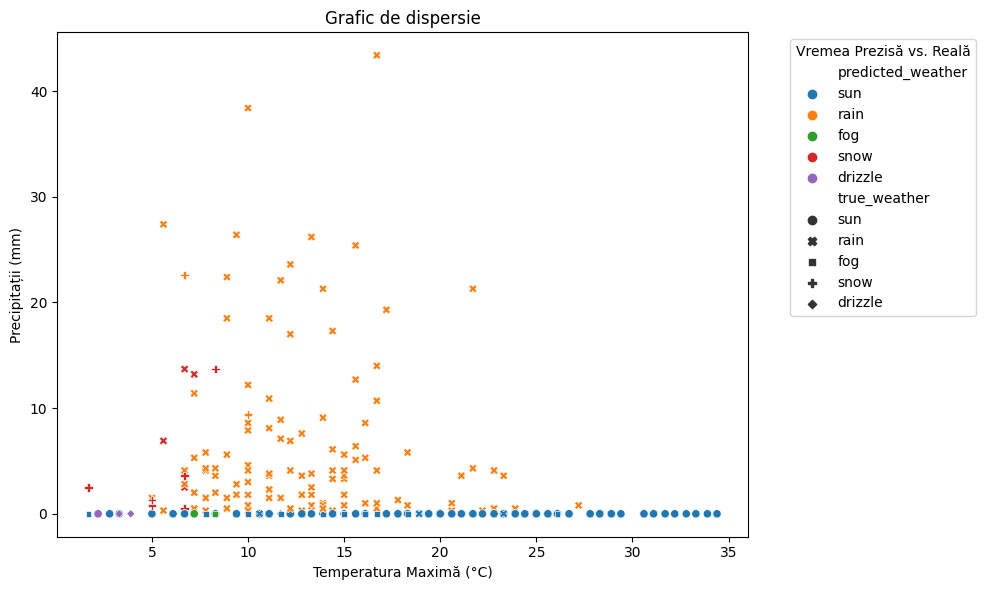

      year  day_of_year  precipitation  temp_max  temp_min  wind true_weather  \
620   2013          255            0.0      25.6      15.0   1.7          sun   
1053  2014          323            0.0      11.1       2.2   1.9          sun   
58    2012           59            3.6       6.7      -0.6   4.2         snow   
233   2012          234            0.0      23.3      13.3   3.0         rain   
416   2013           51            1.5       7.8       1.1   2.1         rain   
670   2013          305            1.3      17.8      11.7   1.4         rain   
363   2012          364            1.5       5.0       3.3   1.7         rain   
374   2013            9           38.4      10.0       1.7   5.1         rain   
1001  2014          271            0.0      18.9      12.2   2.0          fog   
99    2012          100            0.0      20.0       6.1   2.1          sun   
707   2013          342            0.0       2.2      -6.6   2.2          sun   
168   2012          169     

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('seattle-weather.csv')

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['day_of_year'] = df['date'].dt.dayofyear

df = df.drop('date', axis=1)


label_encoder = LabelEncoder()
df['weather'] = label_encoder.fit_transform(df['weather'])


X = df[['year', 'day_of_year', 'precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = GaussianNB()
model.fit(X_train, y_train)


predictions = model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Acuratețea Modelului: {accuracy}')
print(f'Raportul de Clasificare:\n{report}')

print(label_encoder.classes_)

predicted_weather = label_encoder.inverse_transform(predictions)


test_results = pd.DataFrame(X_test, columns=['year', 'day_of_year', 'precipitation', 'temp_max', 'temp_min', 'wind'])
test_results['true_weather'] = label_encoder.inverse_transform(y_test)
test_results['predicted_weather'] = predicted_weather


plt.figure(figsize=(10, 6))
sns.scatterplot(data=test_results, x='temp_max', y='precipitation', hue='predicted_weather', style='true_weather')
plt.title('Grafic de dispersie')
plt.xlabel('Temperatura Maximă (°C)')
plt.ylabel('Precipitații (mm)')
plt.legend(title='Vremea Prezisă vs. Reală', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

test_results_sample = test_results.sample(21)
test_results_sample
print(test_results_sample)

Graficul plasează temperatura maximă pe axa x și precipitațiile pe axa y. Acest lucru permite vizualizarea relației dintre temperatură și precipitații pentru diferite condiții meteo.

Fiecare punct reprezintă o zi din setul de testare, cu coordonatele corespunzătoare valorilor sale de temperatură maximă și precipitații.

Culorile punctelor indică vremea prezisă de model, în timp ce formele punctelor reprezintă condițiile meteo reale. Acest lucru facilitează comparația între predicțiile modelului și adevăratele etichete.

Graficul arată că pentru zilele cu temperaturi maxime mai scăzute și precipitații mai mari, modelul tinde să prezică "ploaie" (evidențiată prin suprapunerea culorilor și formelor), în timp ce pentru zilele cu temperaturi maxime mai înalte și fără precipitații, modelul prezice "soare".

Se observă o suprapunere între culori și forme, ceea ce indică cazurile în care modelul a făcut o predicție incorectă. De exemplu, punctele unde forma reală  nu corespunde cu culoarea prezisă arată unde a greșit modelul.

### **Concluzie**

**Acuratețea Modelului**: Modelul a atins o acuratețe de aproximativ **83.62%**, ceea ce este destul de bun pentru un clasificator Naive Bayes și sugerează că modelul a învățat destul de bine relațiile dintre caracteristici și etichetele meteo.

**Raportul de Clasificare:** Raportul de clasificare arată măsurile de precizie, recall și scor F1 pentru fiecare clasă (tip de vreme).


*   Clasele 0 și 1 (*drizzle* și *fog*) au precizii și recall-uri semnificativ mai scăzute, ceea ce sugerează că modelul are dificultăți în a clasifica corect aceste condiții meteo.
*   Clasele 2  și  4 (*rain* și *sun*) au cele mai bune scoruri, cu o precizie și un recall înalt, ceea ce înseamnă că modelul prezice aceste condiții meteo cu o mare acuratețe.
